# Small Tip of Jupyter Notebook

- green : edit mode
- blue : command mode
- H : keyboard shortcut
---
- Shift-Enter : run cell, select below
- Ctrl-Enter : run selected cells
- Alt-Enter : run cell and insert below
- Y : change cell to code
- M : change cell to markdown
- A : insert cell above
- B : insert cell below
- D,D : delete selected cells
---
- L : toggle line numbers
- Shift-M : merge selected cells, or current cell with cell below if only one cell is selected
- Ctrl-Shift-Minus : split cell at cursor(s)
- X : cut selected cells
- C : copy selected cells
- Shift-V : paste cells above
- V : paste cells below

In [ ]:
!conda install seaborn

In [1]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import torch 

# 0. Tensor?
- A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [3]:
?torch.tensor 

In [9]:
# torch.tensor(), torch.Tensor.detach(), torch.Tensor.clone()

a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float, requires_grad=True)
b = a.detach() # gradient 전파가 안되는 tensor 생성, 메모리 공유
c = a.clone() # 메모리 공유 x
print(a)
print(b)
print(c)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], grad_fn=<CloneBackward>)


In [10]:
b[0][0] = 9
print(a) # 메모리 공유
c[0][0] = 1
print(a) # 메모리 공유 x

tensor([[9., 2.],
        [3., 4.]], requires_grad=True)
tensor([[9., 2.],
        [3., 4.]], requires_grad=True)


In [206]:
d = b.clone().requires_grad_(True)
d

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [209]:
e = d.clone().detach()
e

tensor([[1., 2.],
        [3., 4.]])

In [11]:
# to(), gpu 사용하기
?torch.Tensor.to

In [8]:
!nvidia-smi
# nvidia-smi -l 5

Tue Jun 08 16:22:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.71       Driver Version: 456.71       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2080   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   53C    P5    34W / 275W |   1960MiB /  8192MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = a.to(dtype=torch.int, device=device)
f[0][1] = 9
a, f, device

(tensor([[9., 2.],
         [3., 4.]], requires_grad=True),
 tensor([[9, 9],
         [3, 4]], dtype=torch.int32),
 device(type='cpu'))

In [7]:
if torch.cuda.is_available():
    print('cuda index:', torch.cuda.current_device())
    print('gpu 개수:', torch.cuda.device_count())
    print('graphic name:', torch.cuda.get_device_name())

cuda index: 0
gpu 개수: 1
graphic name: GeForce RTX 2080


### 참고. tensor error 시 check point!
- data가 Tensor로 변환이 되는 data인가?
- 연산하고 있는 Tensor간 data type이 같은가?
- 연산시 CPU Tensor와 GPU Tensor를 같은 device로 통일했는가?

# 1. 텐서의 차원(rank)

- 0차원 -> 스칼라
- 1차원 -> 벡터
- 2차원 -> 2차원 행렬
- 3차원 -> 3차원 행렬
- n차원 -> 랭크 n 텐서

In [26]:
# 0차원 텐서 -> scalar
x = torch.tensor(2)
x, x.dim(), x.shape

(tensor(2), 0, torch.Size([]))

In [29]:
?torch.rand

In [31]:
# 1차원 텐서 -> vector
x = torch.rand(2)
x, x.dim(), x.shape

(tensor([0.9567, 0.4960]), 1, torch.Size([2]))

In [32]:
# 2차원 텐서 -> 2 dimensional matrix
x = torch.rand(2, 3)
x, x.dim(), x.shape

(tensor([[0.6487, 0.4322, 0.9651],
         [0.0065, 0.3156, 0.0146]]),
 2,
 torch.Size([2, 3]))

In [33]:
# 3차원 텐서 -> 3 dimensional matrix
x = torch.rand(3, 2, 5)
x, x.dim(), x.shape

(tensor([[[0.7362, 0.6793, 0.4947, 0.2387, 0.2182],
          [0.3471, 0.0857, 0.4433, 0.8713, 0.9026]],
 
         [[0.2683, 0.5560, 0.2718, 0.9681, 0.8786],
          [0.5316, 0.2807, 0.6531, 0.0437, 0.6223]],
 
         [[0.1831, 0.4879, 0.0941, 0.0482, 0.8167],
          [0.4414, 0.5652, 0.3198, 0.3024, 0.3651]]]),
 3,
 torch.Size([3, 2, 5]))

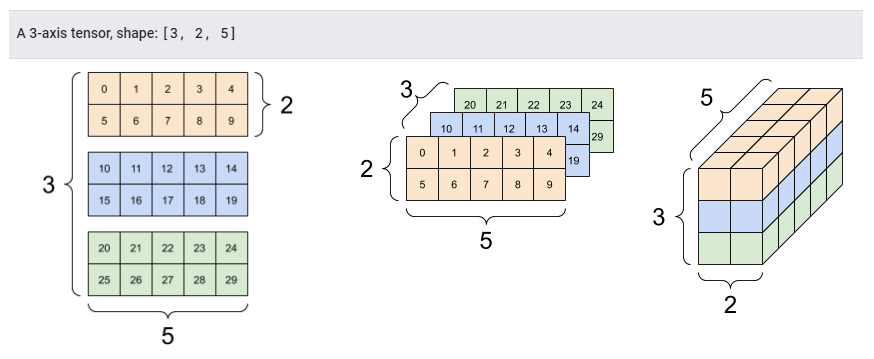

In [20]:
# 4차원 텐서 -> vision분야에서 주로 사용
x = torch.rand(128, 3, 4, 4) # batch-size, channel, height, width
x.dim(), x.shape, x

(4,
 torch.Size([128, 3, 4, 4]),
 tensor([[[[9.3312e-01, 6.9450e-01, 8.1939e-01, 6.9456e-01],
           [4.3015e-01, 8.3778e-01, 8.3677e-01, 8.4494e-01],
           [5.4892e-01, 8.1957e-01, 8.1087e-01, 4.5308e-02],
           [1.8128e-01, 1.5178e-01, 9.4760e-01, 3.2994e-01]],
 
          [[2.7828e-01, 8.2521e-01, 9.4270e-01, 1.0296e-02],
           [7.1561e-01, 7.6844e-01, 9.0474e-03, 9.1219e-01],
           [1.0097e-04, 9.5895e-01, 1.7207e-01, 6.3843e-02],
           [6.0351e-01, 1.8423e-01, 8.8255e-01, 6.9183e-01]],
 
          [[3.8024e-01, 6.5588e-01, 4.1136e-01, 9.8595e-03],
           [9.5834e-01, 2.6156e-03, 4.9787e-01, 1.7209e-01],
           [3.8909e-01, 1.9034e-01, 8.7019e-02, 2.0852e-02],
           [3.7271e-01, 2.3704e-01, 2.3282e-01, 4.7946e-01]]],
 
 
         [[[6.1104e-01, 9.6291e-01, 3.1409e-01, 1.1625e-01],
           [1.3891e-01, 8.2794e-01, 5.3156e-01, 2.8905e-01],
           [2.8994e-01, 2.0780e-01, 6.8637e-01, 9.6146e-01],
           [5.5378e-01, 3.4766e-01, 1.03

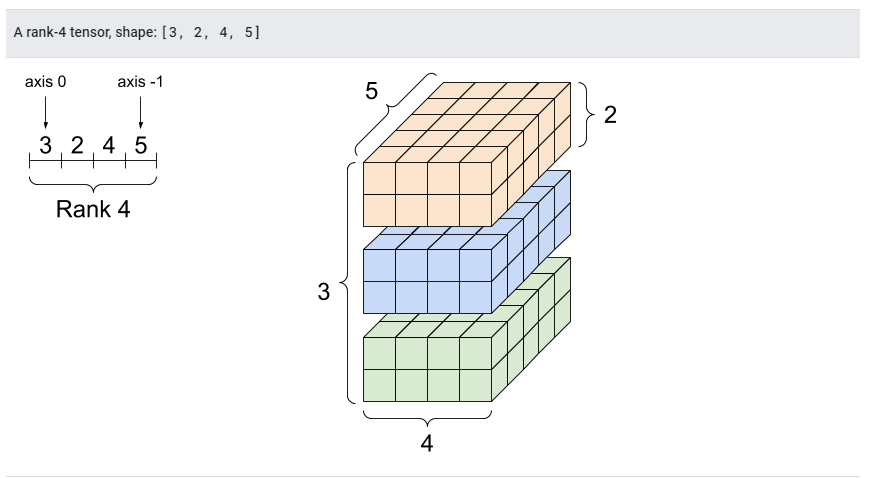

# 2. 차원와 shape 바꾸기

- 차원 늘리기 : unsqueeze()
- 차원 줄이기 : squeeze()
- shpae 바꾸기 : view(), reshape()
- 차원 바꾸기 : transpose(), permute()

In [41]:
? torch.unsqueeze

In [22]:
# unsqueeze(input, dim) / dim(int): the index at which to insert the singleton dimension

x = torch.tensor([[1, 1], [1, 1]])
y = torch.unsqueeze(x, 0) # x = x.unsqueeze(0)
y

tensor([[[1, 1],
         [1, 1]]])

In [23]:
x.dim(), x.shape, y.dim(), y.shape

(2, torch.Size([2, 2]), 3, torch.Size([1, 2, 2]))

In [46]:
x = torch.rand(3, 10, 10) # e.g. mini-batch로 학습 후, 하나의 이미지를 inference할 때
x = x.unsqueeze(0)
x.shape

torch.Size([1, 3, 10, 10])

In [49]:
# squeeze는 차원 size가 1인 차원을 모두 제거
x = torch.rand(2, 1, 1, 1, 2)
x = x.squeeze()
x.dim(), x.shape

(2, torch.Size([2, 2]))

In [52]:
?torch.Tensor.view

In [25]:
# view(shape)

x = torch.tensor([[1, 1], [1, 1]])
x = x.view(4)
x, x.dim(), x.shape

(tensor([1, 1, 1, 1]), 1, torch.Size([4]))

In [32]:
# view() 는 memory를 공유한다.
y = x.view(1, 4)
y[0][0] = 2
y, y.dim(), y.shape, x

(tensor([[2, 1, 1, 1]]), 2, torch.Size([1, 4]), tensor([2, 1, 1, 1]))

In [54]:
# view 사용 시, element 수와 shape을 잘 맞춰줘야한다.
try:
    x = x.view(3, 1)
except Exception as e:
    print(e)

shape '[3, 1]' is invalid for input of size 4


In [107]:
# reshape(shape)
x = x.reshape(4, 1) # view와 비슷하지만, memory 공유가 보장되지 않는다. contiguous하면 view() 반환 (자세한 내용은 2번째 reference 참고)
x, x.dim(), x.shape

(tensor([[1],
         [1],
         [1],
         [1]]),
 2,
 torch.Size([4, 1]))

In [56]:
?torch.transpose

In [40]:
# transpose(dim0, dim1)

x = torch.arange(1, 25).view(2, 3, 4)
x, x.shape

(tensor([[[ 1,  2,  3,  4],
          [ 5,  6,  7,  8],
          [ 9, 10, 11, 12]],
 
         [[13, 14, 15, 16],
          [17, 18, 19, 20],
          [21, 22, 23, 24]]]),
 torch.Size([2, 3, 4]))

In [41]:
x = x.transpose(0, 1)
x, x.shape

(tensor([[[ 1,  2,  3,  4],
          [13, 14, 15, 16]],
 
         [[ 5,  6,  7,  8],
          [17, 18, 19, 20]],
 
         [[ 9, 10, 11, 12],
          [21, 22, 23, 24]]]),
 torch.Size([3, 2, 4]))

In [54]:
? torch.Tensor.permute

In [57]:
# permute(dims), dims: desired ordering of dimensions
x = torch.rand(16, 64, 64, 3) # batch size, height, width, channel 
x = x.permute(0, 3, 1, 2) # batch size, channel, height, width
x.shape

torch.Size([16, 3, 64, 64])

# 3. 텐서의 연산

In [60]:
a = torch.arange(1, 10).view(3, 3).to(dtype=torch.float) # element의 data type이 다르면 행렬곱 등의 연산 시 error
b = torch.ones(3, 3)
a, b

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [61]:
# broadcasting
a + 1

tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])

In [62]:
a + torch.tensor([10, 10, 10])

tensor([[11., 12., 13.],
        [14., 15., 16.],
        [17., 18., 19.]])

In [65]:
# element-wise calculation
a * b

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [66]:
# tensor product
a @ b

tensor([[ 6.,  6.,  6.],
        [15., 15., 15.],
        [24., 24., 24.]])

In [67]:
a.T @ b

tensor([[12., 12., 12.],
        [15., 15., 15.],
        [18., 18., 18.]])

# 4. Autograd

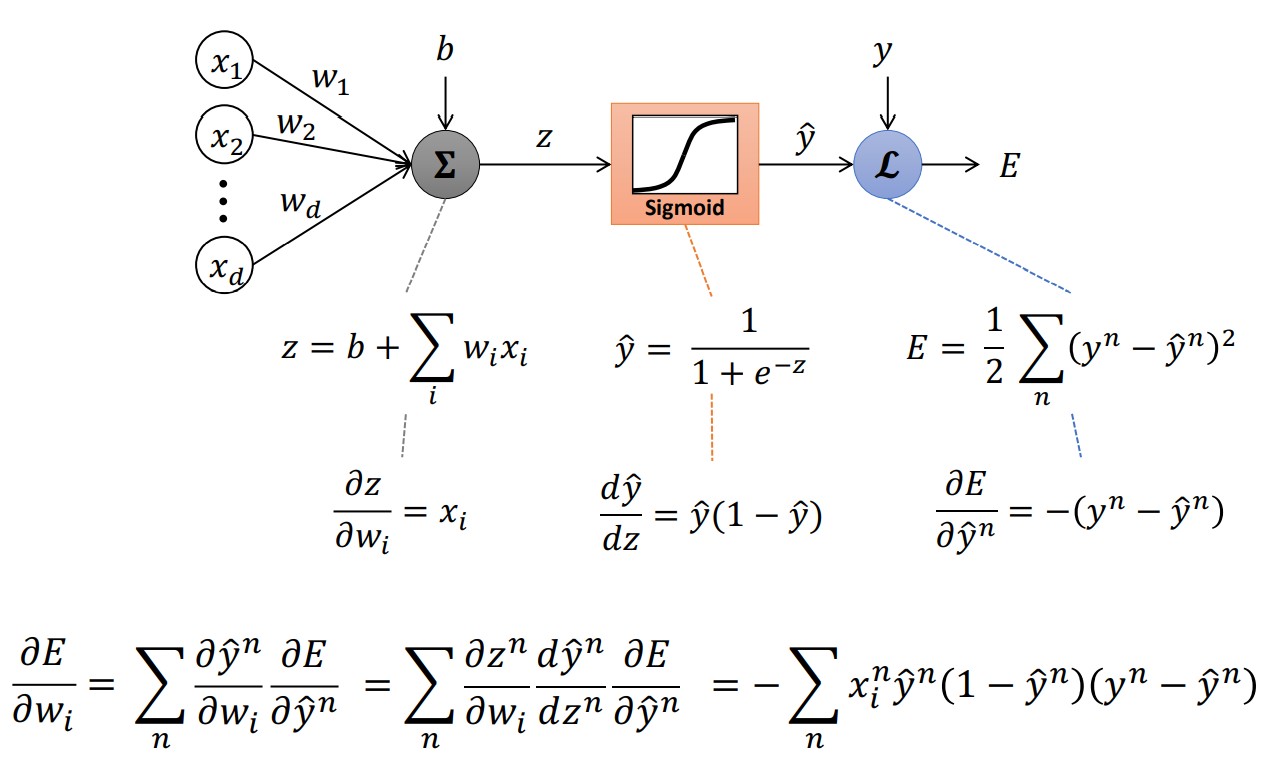

In [61]:
x = torch.tensor([5., 3., 9., 7.], requires_grad = True)
w = torch.tensor([0., 1., 2., 3.], requires_grad = True)
b = torch.tensor(0., requires_grad = True)

z = sum(x*w) + b
x, w, z

(tensor([5., 3., 9., 7.], requires_grad=True),
 tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(42., grad_fn=<AddBackward0>))

In [62]:
z.backward()
x.grad, w.grad, b.grad

(tensor([0., 1., 2., 3.]), tensor([5., 3., 9., 7.]), tensor(1.))

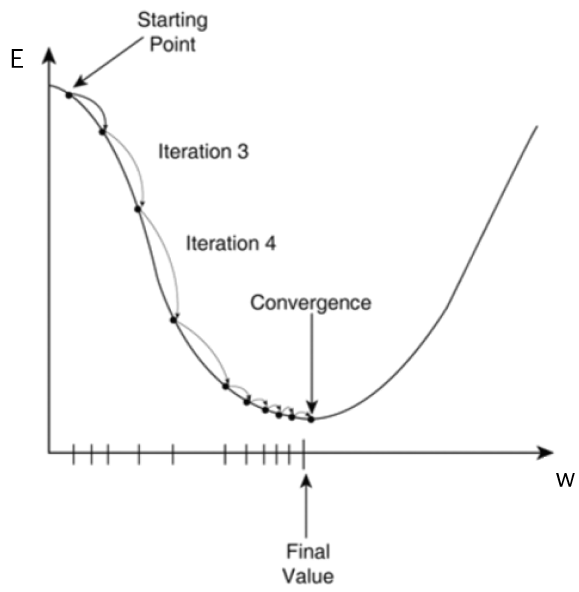

In [63]:
learning_rate = 0.01
w = w - learning_rate*w.grad
print(w)

tensor([-0.0500,  0.9700,  1.9100,  2.9300], grad_fn=<SubBackward0>)


In [64]:
z = sum(x*w) + b
z

tensor(40.3600, grad_fn=<AddBackward0>)

![tensor graph](https://i0.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2018/09/TensorBoard-1st-basic-graph.png?resize=560%2C564&ssl=1)

In [107]:
import unittest
import numpy as np

class Tensor:
    def __init__(self, data):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError(f'{type(data)}은(는) 지원하지 않습니다.')
                
        self.data = data
        self.grad = None
        self.creator = None

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        if self.grad == None:
            self.grad = np.ones_like(self.data)
            print(id(self.grad))

        funcs = [self.creator]

        while funcs:
            f = funcs.pop()
            gys = [output.grad for output in f.outputs]
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = gxs,

            for x, gx in zip(f.inputs, gxs):
                if x.grad == None:
                    x.grad = gx
                else:
                    x.grad = x.grad + gx
                
                if x.creator is not None:
                    funcs.append(x.creator)

def as_array(x):
    return np.array(x) if np.isscalar(x) else x
    
class Function:
    def __call__(self, *inputs):
        xs = [x.data for x in inputs]
        ys = self.forward(*xs)
        if not isinstance(ys, tuple):
            ys = ys,
        outputs = [Tensor(as_array(y)) for y in ys]

        for output in outputs:
            output.set_creator(self)

        self.inputs = inputs
        self.outputs = outputs

        return outputs if len(outputs) > 1 else outputs[0]
    
    def forward(self, x):
        raise NotImplementedError

    def backward(self, gy):
        raise NotImplementedError

class Square(Function):
    def forward(self, x):
        return x ** 2

    def backward(self, gy):
        x = self.inputs[0].data
        gx = 2 * x * gy
        return gx

def square(x):
    return Square()(x)


class Add(Function):
    def forward(self, x0, x1):
        return x0 + x1

    def backward(self, gy):
        return gy, gy

def add(x0, x1):
    return Add()(x0, x1)


x, y = Tensor(np.array(2)), Tensor(np.array(3))
z = add(square(x), square(y))
z.backward()

print(x.grad, y.grad, z.data)

3093745148992
4 6 13



reference
- https://pytorch.org/docs/stable/index.html
- https://subinium.github.io/pytorch-Tensor-Variable/ (텐서 다루기)
- https://statisticsplaybook.tistory.com/6 (텐서 연산)